<a href="https://colab.research.google.com/github/visucs/test/blob/main/day13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as  np
import pandas as pd


In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. preprocess + EDA + Feature selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [12]:
import matplotlib.pyplot as plt


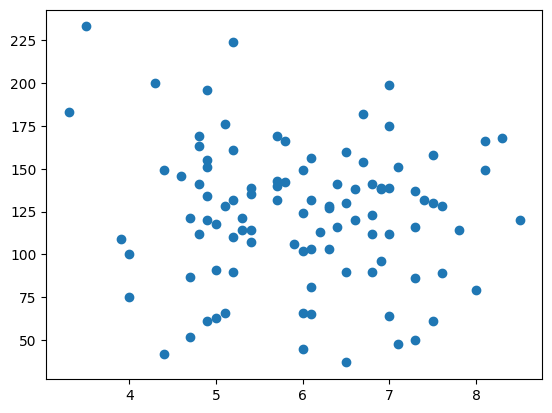

In [15]:
plt.scatter(df['cgpa'],df['iq'])

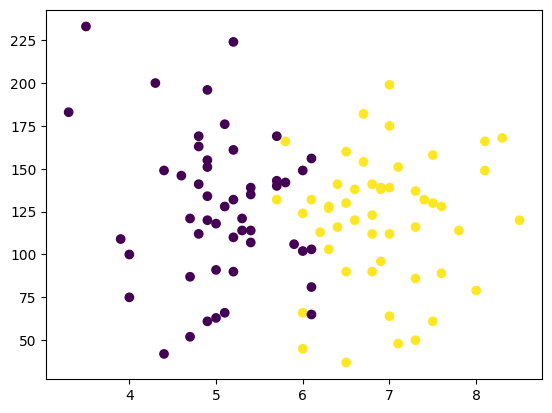

In [16]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [17]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=x)

https://docs.google.com/spreadsheets/d/1EeWoKPlglP3q-0sX1gB1eOSzy3051bY7hcaDYTkSCoM/edit#gid=0


In [19]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
y.shape

(100,)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [25]:
x_train

,cgpa,iq
43,6.8,141.0
24,4.7,121.0
14,6.1,103.0
31,3.9,109.0
12,5.4,139.0
...,...,...
80,4.9,196.0
54,6.4,141.0
79,6.5,90.0
30,7.6,128.0


In [26]:
y_train

,placement
43,1
24,0
14,0
31,0
12,0
...,...
80,0
54,1
79,1
30,1


In [27]:
x_test

,cgpa,iq
71,6.1,132.0
55,7.8,114.0
96,4.4,42.0
39,4.6,146.0
57,6.5,130.0
67,5.0,118.0
92,5.2,110.0
90,7.3,86.0
89,4.9,151.0
60,6.9,139.0


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)

In [33]:
x_train

array([[ 0.70039265,  0.41109748],
       [-1.14840917, -0.0822195 ],
       [ 0.08412537, -0.52620477],
       [-1.85271463, -0.37820968],
       [-0.5321419 ,  0.36176578],
       [ 1.31665992,  0.8304169 ],
       [-0.97233281, -1.56217041],
       [-0.00391281, -1.95682399],
       [ 0.70039265, -0.8468608 ],
       [ 1.14058356,  0.31243408],
       [-0.70821826,  0.90441445],
       [-0.17998917,  1.02774369],
       [ 0.08412537, -1.46350702],
       [-0.88429463, -0.82219495],
       [ 0.4362781 , -2.15415078],
       [ 0.87646901,  1.24973633],
       [-0.97233281,  0.23843654],
       [-1.06037099,  0.41109748],
       [-0.62018008, -0.25488044],
       [ 0.78843083,  0.33709993],
       [-0.26802735,  0.46042917],
       [ 0.96450719, -1.88282645],
       [-0.88429463, -1.51283872],
       [ 0.87646901,  1.8417167 ],
       [ 1.84488901,  1.02774369],
       [-0.5321419 , -0.25488044],
       [ 1.14058356, -1.83349475],
       [-0.97233281,  0.75641936],
       [-1.14840917,

In [34]:
x_test = scaler.transform(x_test)

In [35]:
x_test

array([[ 0.08412537,  0.18910484],
       [ 1.58077447, -0.25488044],
       [-1.41252372, -2.03082154],
       [-1.23644736,  0.53442672],
       [ 0.4362781 ,  0.13977314],
       [-0.88429463, -0.15621704],
       [-0.70821826, -0.35354383],
       [ 1.14058356, -0.9455242 ],
       [-0.97233281,  0.65775596],
       [ 0.78843083,  0.36176578]])

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression()

In [40]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(x_test)

In [42]:
y_test

,placement
71,1
55,1
96,0
39,0
57,1
67,0
92,0
90,1
89,0
60,1


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred)

1.0

In [47]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

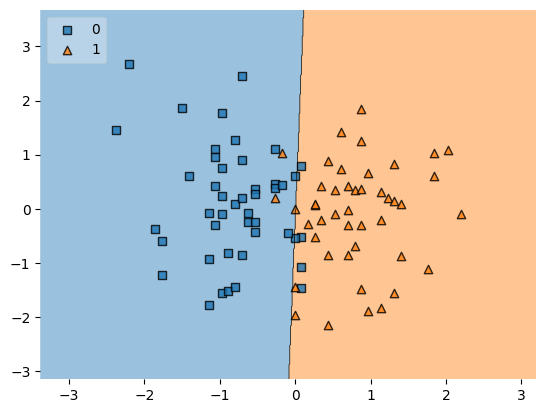

In [48]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [49]:
import pickle

In [50]:
pickle.dump(clf,open('model.pkl','wb'))